# Shortest path of a network

First, just check networkx package shortest_path. All functions are useful.


Tutorial from: https://automating-gis-processes.github.io/site/develop/notebooks/L6/network-analysis.html#Shortest-path-analysis


In [44]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd

In [28]:
place_name = 'Kamppi, Helsinki, Finland'
graph = ox.graph_from_place(place_name, network_type='drive')


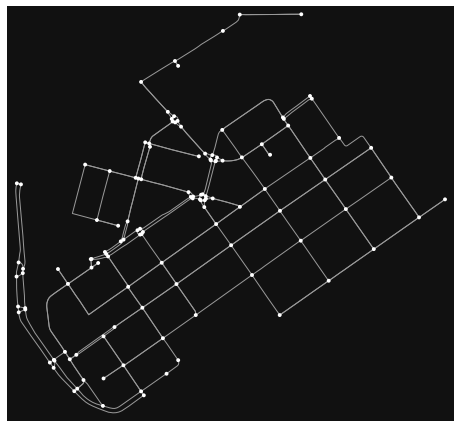

In [29]:
fig, ax = ox.plot_graph(graph)

In [30]:
# retrive only edges
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [31]:
# check columns
edges.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'length',
       'geometry', 'junction', 'bridge', 'access', 'u', 'v', 'key'],
      dtype='object')

In [32]:
# check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
edges.head() # u, v are the two end points?

,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,junction,bridge,access,u,v,key
0,23856784,True,2,Mechelininkatu,primary,40,40.885,"LINESTRING (24.92106 60.16479, 24.92095 60.164...",NaN,NaN,NaN,25216594,1372425714,0
1,"[29977177, 30470347]",True,3,Mechelininkatu,primary,40,16.601,"LINESTRING (24.92103 60.16366, 24.92104 60.163...",NaN,NaN,NaN,25238874,1372425713,0
2,"[372440330, 8135861]",True,2,NaN,primary,40,25.190,"LINESTRING (24.92129 60.16463, 24.92127 60.164...",NaN,NaN,NaN,25238944,25216594,0
3,"[25514547, 677423564, 30288797, 30288799]",True,"[2, 3]",Mechelininkatu,primary,40,242.476,"LINESTRING (24.92129 60.16463, 24.92136 60.164...",NaN,NaN,NaN,25238944,319896278,0
4,"[30568275, 36729015, 316590744, 316590745, 316...",True,NaN,Fredrikinkatu,tertiary,30,139.090,"LINESTRING (24.93702 60.16433, 24.93700 60.164...",NaN,NaN,NaN,25291537,25291591,0


In [34]:
print(edges['highway'].value_counts())

residential      113
tertiary          78
primary           26
secondary         17
unclassified      10
living_street      4
primary_link       1
Name: highway, dtype: int64


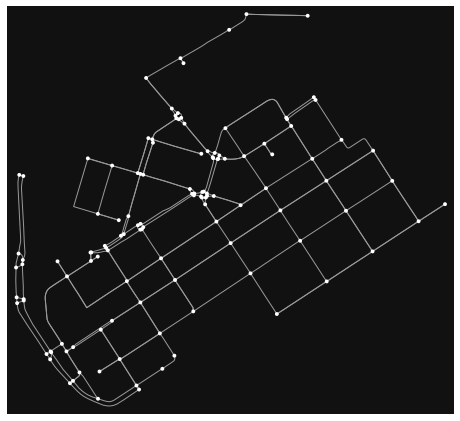

In [35]:
# project the map from lat&lon to UTM zones
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [59]:
graph

In [60]:
graph_proj

In [36]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [37]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [38]:
edges_proj.head()

,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,junction,access,u,v,key
0,23856784,True,2,Mechelininkatu,primary,40,40.885,"LINESTRING (384631.322 6671580.071, 384624.750...",NaN,NaN,NaN,25216594,1372425714,0
1,"[78537378, 8169098, 29081876, 78537375]",True,"[2, 3]",Mechelininkatu,primary,40,85.540,"LINESTRING (384624.179 6671539.986, 384623.768...",NaN,NaN,NaN,1372425714,25238874,0
2,29066052,True,2,NaN,primary,40,20.591,"LINESTRING (384624.179 6671539.986, 384627.284...",NaN,NaN,NaN,1372425714,1372425718,0
3,"[29977177, 30470347]",True,3,Mechelininkatu,primary,40,16.601,"LINESTRING (384625.787 6671454.380, 384626.281...",NaN,NaN,NaN,25238874,1372425713,0
4,57839670,True,NaN,Itämerenkatu,tertiary,40,20.414,"LINESTRING (384627.187 6671437.809, 384646.250...",NaN,NaN,NaN,1372425713,568147264,0


## Analyze the network properties

In [39]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

{'n': 124,
 'm': 249,
 'k_avg': 4.016129032258065,
 'intersection_count': 116,
 'streets_per_node_avg': 3.217741935483871,
 'streets_per_node_counts': {0: 0, 1: 8, 2: 1, 3: 71, 4: 44},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06451612903225806,
  2: 0.008064516129032258,
  3: 0.5725806451612904,
  4: 0.3548387096774194},
 'edge_length_total': 19987.009000000016,
 'edge_length_avg': 80.26911244979927,
 'street_length_total': 13671.792999999998,
 'street_length_avg': 74.70925136612021,
 'street_segments_count': 183,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0244621366336473,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

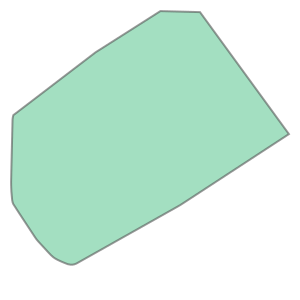

In [40]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull # sw: first-multilinestring; second-convex hull. 
# Show output
convex_hull

In [45]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value

# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

n                                                                                    124
m                                                                                    249
k_avg                                                                            4.01613
intersection_count                                                                   116
streets_per_node_avg                                                             3.21774
streets_per_node_counts                                 {0: 0, 1: 8, 2: 1, 3: 71, 4: 44}
streets_per_node_proportion            {0: 0.0, 1: 0.06451612903225806, 2: 0.00806451...
edge_length_total                                                                  19987
edge_length_avg                                                                  80.2691
street_length_total                                                              13671.8
street_length_avg                                                                74.7093
street_segments_count

## Shortest path analysis

In [46]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Centroid
centroid = convex_hull.centroid # return centroid

# Show
print(centroid)


POINT (385170.0891607622 6671717.293203074)


In [48]:
# nodes
nodes_proj.head() # sw: you need to have nodes and edges. Notice the use of node id here.

,y,x,osmid,lon,lat,highway,geometry
25216594,6.671580e+06,384631.322372,25216594,24.921057,60.164794,NaN,POINT (384631.322 6671580.071)
1372425714,6.671540e+06,384624.178763,1372425714,24.920951,60.164432,NaN,POINT (384624.179 6671539.986)
25238874,6.671454e+06,384625.787221,25238874,24.921028,60.163665,NaN,POINT (384625.787 6671454.380)
1372425713,6.671438e+06,384627.187049,1372425713,24.921063,60.163516,NaN,POINT (384627.187 6671437.809)
25238944,6.671562e+06,384643.473274,25238944,24.921286,60.164631,NaN,POINT (384643.473 6671561.534)


In [49]:
# Get the x coordinates of the nodes
nodes_proj['x'] = nodes_proj["x"].astype(float) 

# Retrieve the maximum x value (i.e. the most eastern)
maxx = nodes_proj['x'].max()
print(maxx)

385855.03009928943


In [50]:
# Retrieve the node that is the most eastern one and get the Shapely Point geometry out of it
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
print(target)

POINT (385855.0300992894 6671721.810323974)


In [52]:
# Get the nearest centroid as the source node.

# Get origin x and y coordinates
orig_xy = (centroid.y, centroid.x)

# Get target x and y coordinates
target_xy = (target.y, target.x)

# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
print(orig_node) # sw: return source node id

# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
print(target_node) # sw: return target node id


301360197
317703609


In [53]:
# Retrieve the rows from the nodes GeoDataFrame
o_closest = nodes_proj.loc[orig_node]
t_closest = nodes_proj.loc[target_node]

In [55]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head() # sw: Wait, you need to have the dataframe for OD? No.

,y,x,osmid,lon,lat,highway,geometry
301360197,6.671721e+06,385166.707932,301360197,24.930617,60.166212,NaN,POINT (385166.708 6671721.244)
317703609,6.671722e+06,385855.030099,317703609,24.943012,60.166410,traffic_signals,POINT (385855.030 6671721.810)


In [62]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')
# sw: weight is for distance. 
# sw: graph and graph_proj are basically directly downloaded from osm. 
# sw: Both seem some objects from networkx.

# Show what we have
print(route)

[301360197, 1372441183, 1372441170, 60170471, 1377211668, 1377211666, 25291565, 25291564, 317703609]


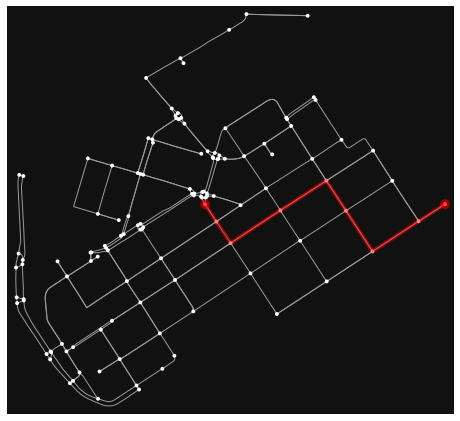

In [64]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route) # sw: graph and route

In [61]:
graph_proj['length']

KeyError: 'length'

In [19]:
edges = ox.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

In [20]:
print(edges.shape)

(249, 14)


<AxesSubplot:>

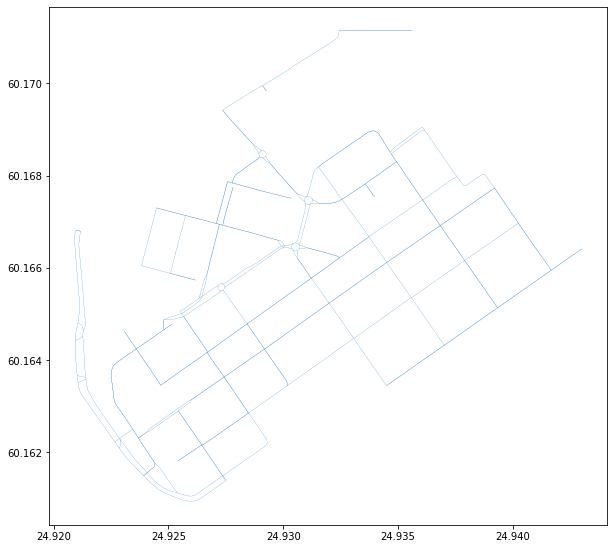

In [21]:
edges.plot(figsize = (10,10), linewidth = 0.2)

In [22]:
edges.head()

,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,junction,bridge,access,u,v,key
0,23856784,True,2,Mechelininkatu,primary,40,40.885,"LINESTRING (24.92106 60.16479, 24.92095 60.164...",NaN,NaN,NaN,25216594,1372425714,0
1,"[29977177, 30470347]",True,3,Mechelininkatu,primary,40,16.601,"LINESTRING (24.92103 60.16366, 24.92104 60.163...",NaN,NaN,NaN,25238874,1372425713,0
2,"[372440330, 8135861]",True,2,NaN,primary,40,25.190,"LINESTRING (24.92129 60.16463, 24.92127 60.164...",NaN,NaN,NaN,25238944,25216594,0
3,"[25514547, 677423564, 30288797, 30288799]",True,"[2, 3]",Mechelininkatu,primary,40,242.476,"LINESTRING (24.92129 60.16463, 24.92136 60.164...",NaN,NaN,NaN,25238944,319896278,0
4,"[30568275, 36729015, 316590744, 316590745, 316...",True,NaN,Fredrikinkatu,tertiary,30,139.090,"LINESTRING (24.93702 60.16433, 24.93700 60.164...",NaN,NaN,NaN,25291537,25291591,0


## Shortest path between two nodes

In [26]:
# connect node 0 and 10
print(edges.loc[0,:])
print(edges.loc[10,:])

osmid                                                23856784
oneway                                                   True
lanes                                                       2
name                                           Mechelininkatu
highway                                               primary
maxspeed                                                   40
length                                                 40.885
geometry    LINESTRING (24.9210566 60.1647939, 24.9209527 ...
junction                                                  NaN
bridge                                                    NaN
access                                                    NaN
u                                                    25216594
v                                                  1372425714
key                                                         0
Name: 0, dtype: object
osmid              [21081120, 332402667, 316713564, 36729011]
oneway                                         

In [27]:
edges.loc[0,:].plot()

TypeError: no numeric data to plot

## Shortest path between all the nodes